# Time series

LSTM, GRU, RNN계열의 모델

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, mean_squared_error, RocCurveDisplay
from sklearn.model_selection import KFold, train_test_split



data = np.genfromtxt("./oneD_power.csv", delimiter=",", skip_header=1)

X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
nx_scaler = MinMaxScaler()
# Scaler2 = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



In [2]:
def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 20  # 과거 10개 데이터를 기반으로 다음 데이터를 예측
X, y = create_sequences(nx_scaler.fit_transform(data), sequence_length)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 모델 구축
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, data.shape[1])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


2024-05-26 19:05:54.327047: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 19:05:57.993870: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 19:05:58.004273: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
model.fit(X, y, epochs=2, validation_split=0.1, verbose=1)

# 모델 평가
mse = model.evaluate(X, y)
print(f"Mean Squared Error: {mse:.2f}")


Epoch 1/2
7031/7031 [==============================] - 209s 30ms/step - loss: 0.1288 - val_loss: 0.1568
Epoch 2/2
7812/7812 [==============================] - 118s 15ms/step - loss: 0.1314
Mean Squared Error: 0.13


In [5]:
predicted = model.predict(X)


7812/7812 [==============================] - 80s 10ms/step


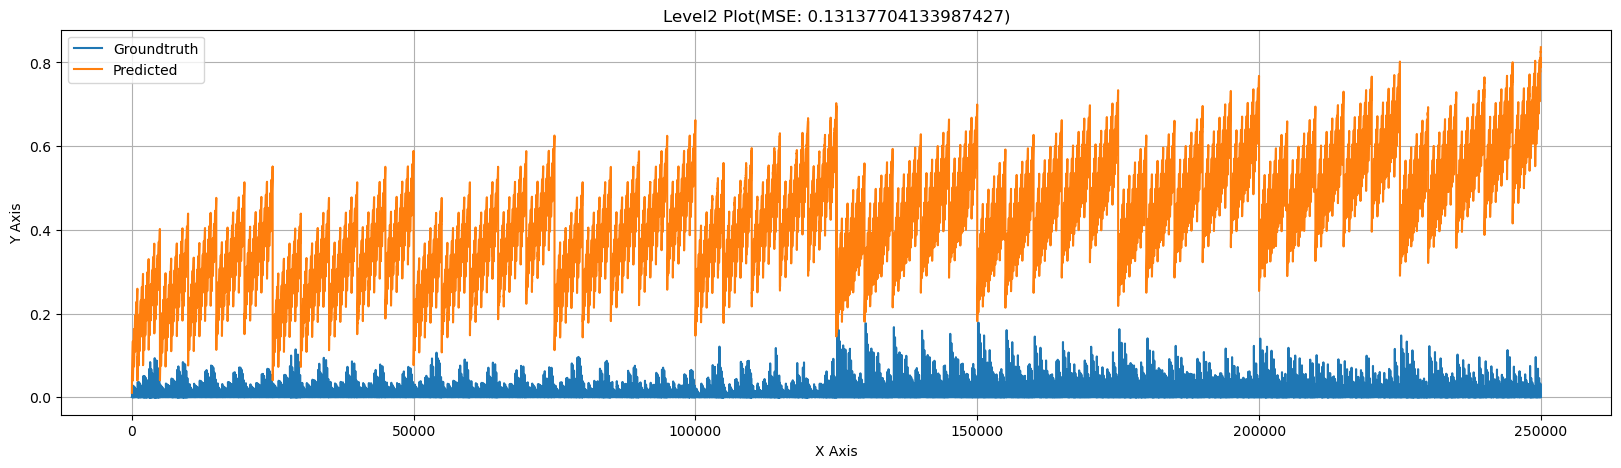

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,5))
plt.plot(data[:,-1], label='Groundtruth')
plt.plot(predicted, label='Predicted')
plt.title(f'Level2 Plot(MSE: {mse})')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.grid(True)
plt.show()
